In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter('ignore')
from sklearn import datasets as ds

In [181]:
%matplotlib inline

In [378]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

In [452]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [453]:
# print(housing.DESCR)

In [454]:
# print(housing.DESCR)

In [380]:
# housing.feature_names

In [455]:
df_housing = pd.DataFrame(data=housing.data, columns=housing.feature_names)

In [382]:
df_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [383]:
print(df_housing.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [384]:
df_housing['prices'] = housing.target

In [385]:
df_housing.shape

(1460, 81)

In [386]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [457]:
df_housing.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 80, dtype: int64

In [459]:
df_nulls = pd.DataFrame(df_housing.isnull().sum(), columns=['count_val'])
df_nulls[df_nulls.count_val > 0]

df_nulls[df_nulls.count_val > 0].index.to_list()

(19, 1)

In [389]:
df_housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,prices
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [390]:
def impute_values(df, num_filna='mean'):
    df_nulls = pd.DataFrame(df.isnull().sum(), columns=['count_val'])
    for col in df_nulls[df_nulls.count_val > 0].index.to_list():
        if df[col].dtype != "object":
            if  num_filna == 'mean':
                # fill with median
                df[col] = df[col].fillna(df[col].mean())
                print("\nImputed numerical missing values with 'mean'")
            elif  num_filna == 'median':
                # fill with median
                df[col] = df[col].fillna(df[col].median())
                print("\nImputed numerical missing values with 'median'")
            else:
                print("\nnum_filna values can be 'mean' or 'median'")
        else:
            # most recurring values
            df[col] = df[col].fillna(df[col].mode().iloc[0])
            print("\nImputed categorical missing values with 'most frequent value'")
    return df

In [391]:
df_housing = impute_values(df_housing)

In [394]:
print(f"cols with na: {df_nulls[df_nulls.count_val > 0].shape[0]}")

cols with na: 0


In [395]:
def feature_types(df):
    cat_features = [col for col in df.columns if df[col].dtype == 'object']
    num_features = [col for col in df.columns if not df[col].dtype == 'object']
    print(f"Catagorical feature count: {len(cat_features)} \nNumerical feature count: {len(num_features)}")
    print(f"\nCatagorical features: \n\t{cat_features} \n\nNumerical features: \n\t{num_features}")
    return cat_features, num_features

In [396]:
cat_features, num_features = feature_types(df=df_housing)

Catagorical feature count: 43 
Numerical feature count: 38

Catagorical features: 
	['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] 

Numerical features: 
	['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbv

In [397]:
df_housing[cat_features].describe().T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,1460,2,Grvl,1419
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [462]:
df_housing[cat_features].describe().T.to_csv("test.csv")

In [398]:
df_housing[cat_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [399]:
def one_hot_encoding(df, cat_features):
    from sklearn.preprocessing import OneHotEncoder
    # cat_features, _ = feature_types(df)
    # Initialize 
    encoder = OneHotEncoder(sparse_output=False)
    # Fit and transform 
    one_hot_encoded = encoder.fit_transform(df[cat_features])
    # df with the encoded columns
    one_hot_df = pd.DataFrame(one_hot_encoded, 
                              columns=encoder.get_feature_names_out(cat_features))
    # concat the one-hot encoded columns with the original df
    df_encoded = pd.concat([df.drop(cat_features, axis=1), one_hot_df], axis=1)
    print(f"\Shape of the df: {df_encoded.shape}")
    return df_encoded

In [400]:
df_encoded = one_hot_encoding(df=df_housing)

Catagorical feature count: 43 
Numerical feature count: 38

Catagorical features: 
	['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] 

Numerical features: 
	['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbv

In [401]:
df_encoded.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.020738,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,-0.051787,0.126580,-0.023461,-0.089928,-0.021846,-0.037020,-0.018090,0.015818,-0.072074,0.124842
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.034852,0.016241,-0.037020,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011959,-0.014874,...,-0.003073,-0.015827,-0.002378,0.020457,-0.014289,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009018,0.030002,-0.018090,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.009689,0.021369,...,-0.005337,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.004865,0.000983,0.015818,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009914,0.000765,...,-0.006909,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.015881,0.024359,-0.072074,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.084241,-0.019560,...,0.027414,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


In [409]:
def corr_with_target(df, treshold_corr=0.5, target_col="prices"):
    df_corr = pd.DataFrame(data=df.drop(target_col, axis=1).corrwith(df[target_col])).reset_index()
    df_corr.rename(columns={"index": "col_name", 0: "corr_val"}, inplace=True)
    features_threshold_corr = df_corr[df_corr.corr_val.abs() > treshold_corr].col_name.to_list()
    df_final = pd.concat([df[features_threshold_corr], df[target_col]], axis=1)
    return df_final, features_threshold_corr

In [410]:
df_final, _ = corr_with_target(df_encoded, target_col="prices")

In [411]:
df_final.shape

(1460, 16)

In [412]:
df_final.corr()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,ExterQual_TA,BsmtQual_Ex,KitchenQual_Ex,KitchenQual_TA,GarageFinish_Unf,prices
OverallQual,1.000000,0.572323,0.550684,0.537808,0.476224,0.593007,0.550600,0.427452,0.600671,0.562022,-0.646247,0.470780,0.425750,-0.553891,-0.537152,0.790982
YearBuilt,0.572323,1.000000,0.592855,0.391452,0.281986,0.199010,0.468271,0.095589,0.537850,0.478954,-0.589126,0.319394,0.204430,-0.459792,-0.622428,0.522897
YearRemodAdd,0.550684,0.592855,1.000000,0.291066,0.240379,0.287389,0.439046,0.191740,0.420622,0.371600,-0.565424,0.286165,0.237868,-0.576964,-0.461207,0.507101
TotalBsmtSF,0.537808,0.391452,0.291066,1.000000,0.819530,0.454868,0.323722,0.285573,0.434585,0.486665,-0.390398,0.403166,0.360271,-0.311190,-0.372025,0.613581
1stFlrSF,0.476224,0.281986,0.240379,0.819530,1.000000,0.566024,0.380637,0.409516,0.439317,0.489782,-0.312844,0.377387,0.347257,-0.273566,-0.321687,0.605852
GrLivArea,0.593007,0.199010,0.287389,0.454868,0.566024,1.000000,0.630012,0.825489,0.467247,0.468997,-0.386146,0.309962,0.306604,-0.350179,-0.317842,0.708624
FullBath,0.550600,0.468271,0.439046,0.323722,0.380637,0.630012,1.000000,0.554784,0.469672,0.405656,-0.466339,0.237403,0.174759,-0.418698,-0.435178,0.560664
TotRmsAbvGrd,0.427452,0.095589,0.191740,0.285573,0.409516,0.825489,0.554784,1.000000,0.362289,0.337822,-0.242485,0.240581,0.247358,-0.210428,-0.203735,0.533723
GarageCars,0.600671,0.537850,0.420622,0.434585,0.439317,0.467247,0.469672,0.362289,1.000000,0.882475,-0.481825,0.356425,0.273275,-0.399449,-0.481751,0.640409
GarageArea,0.562022,0.478954,0.371600,0.486665,0.489782,0.468997,0.405656,0.337822,0.882475,1.000000,-0.445260,0.370223,0.296180,-0.370935,-0.447208,0.623431


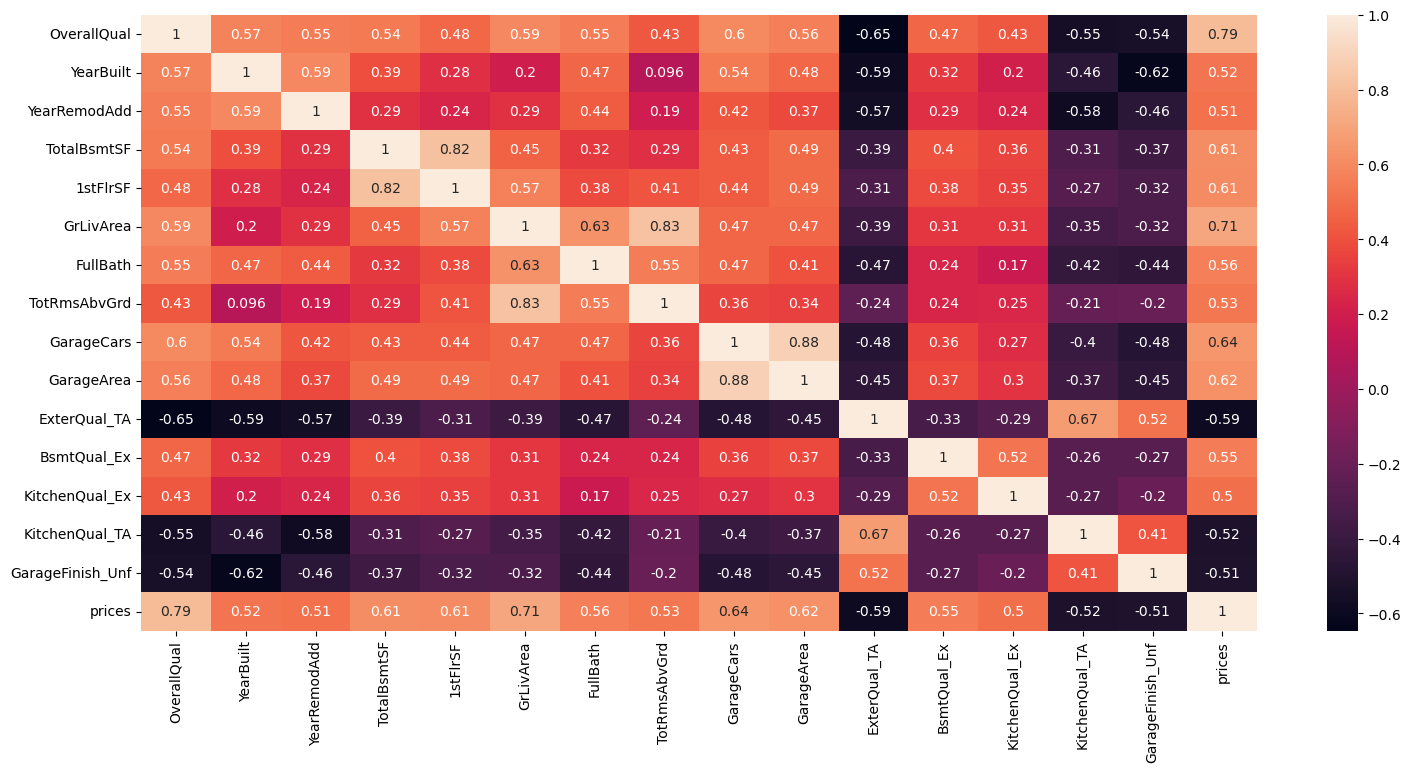

In [465]:
# import seaborn as sns
fig = plt.gcf()  # Get the current figure
fig.set_size_inches(18, 8)  # Set the size in inches
sns.heatmap(df_final.corr(), annot=True)
plt.show()

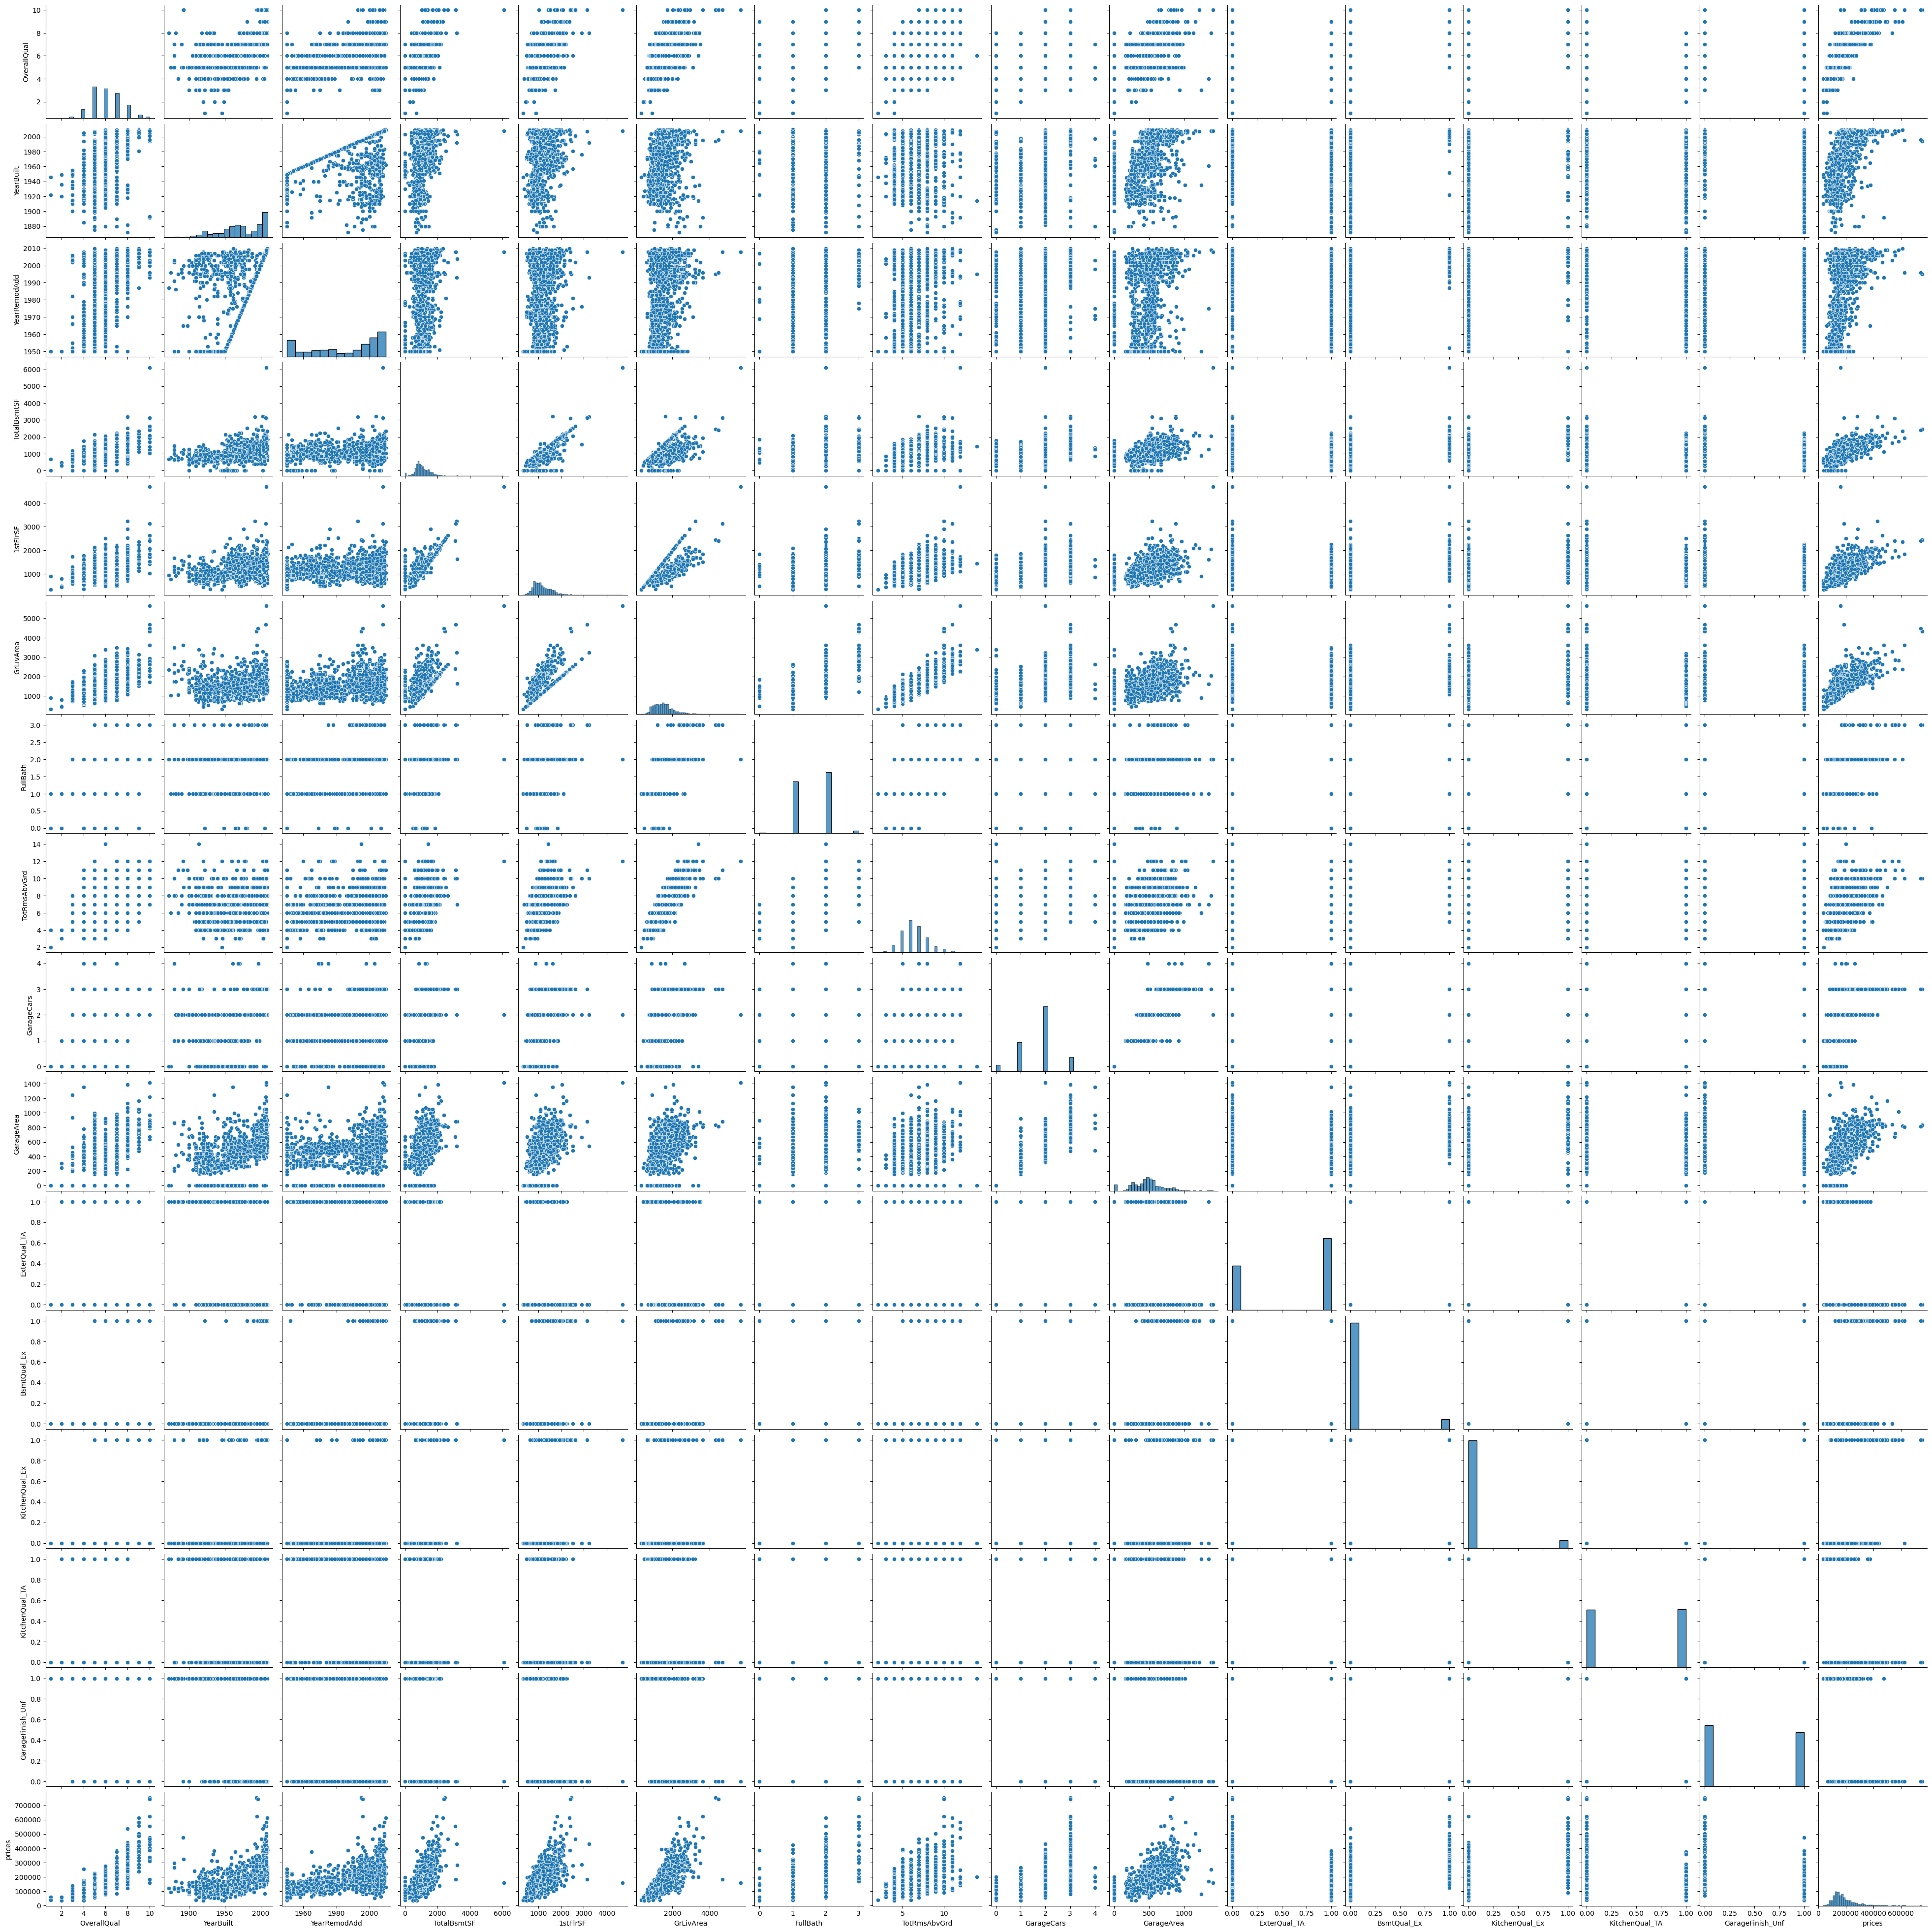

In [414]:
import seaborn as sns
sns.pairplot(df_final)

In [415]:
def plot_corr_with_target(df, target_col):
    for ind, col in enumerate(df.drop(target_col, axis=1).columns):
        plt.scatter(df[col], df[target_col])
        plt.xlabel(col)
        plt.ylabel(target_col)
        plt_name = f"plots/{ind}.{col}_with_{target_col}.png"
        plt.title(plt_name)
        plt.savefig(plt_name)
        plt.show()

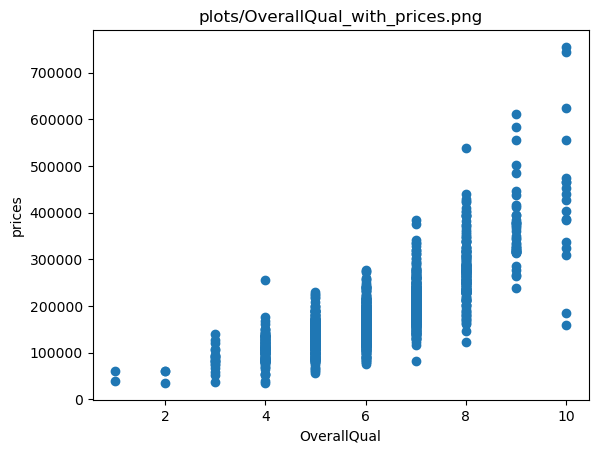

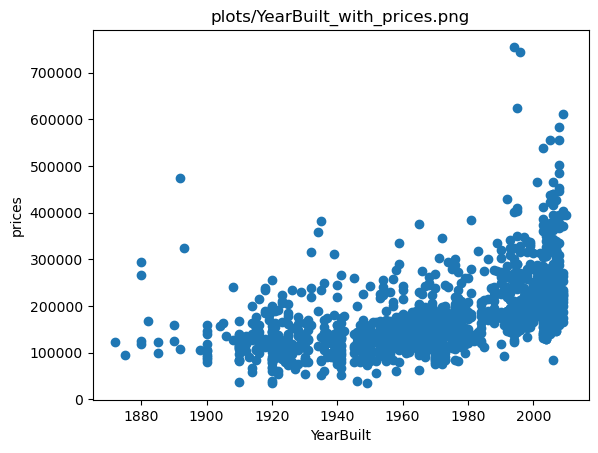

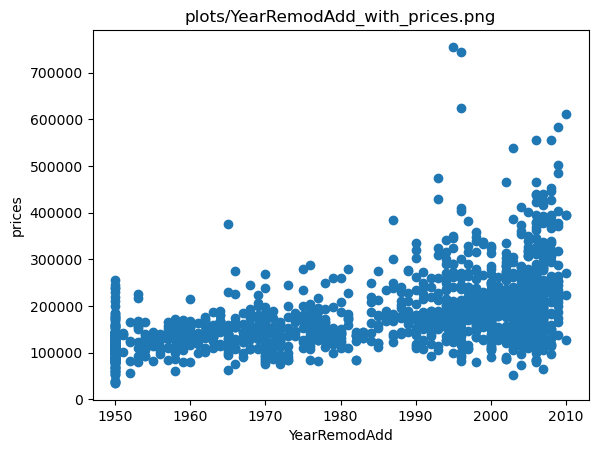

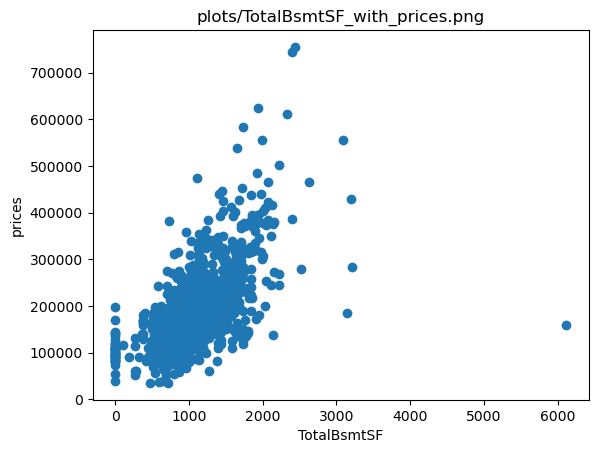

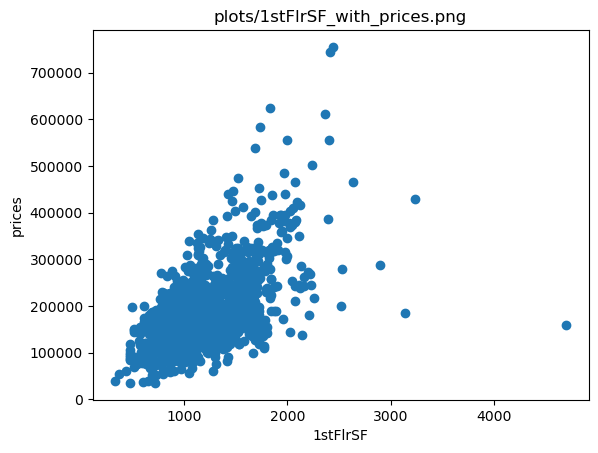

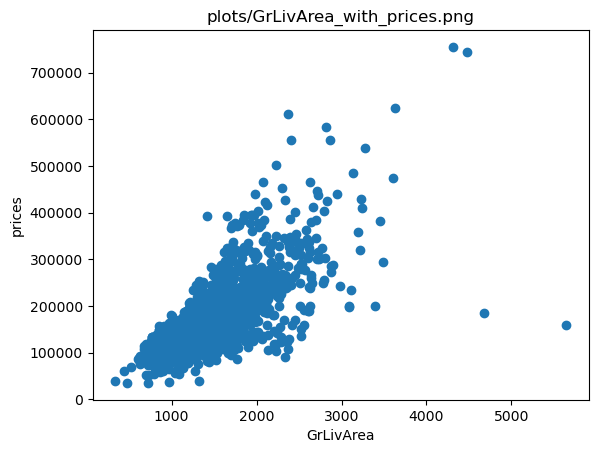

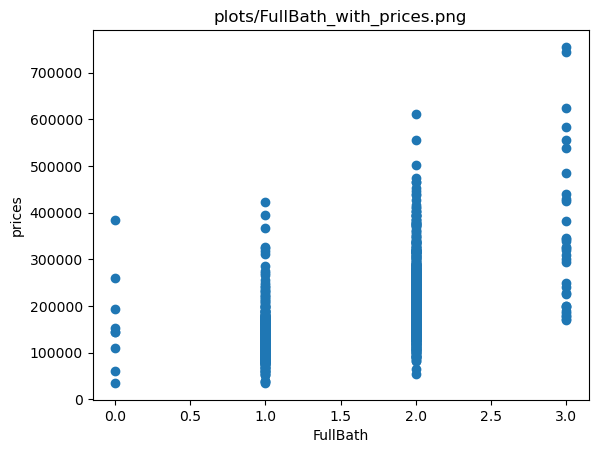

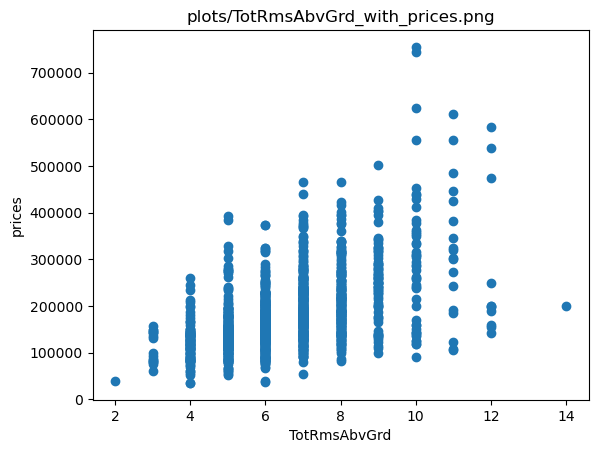

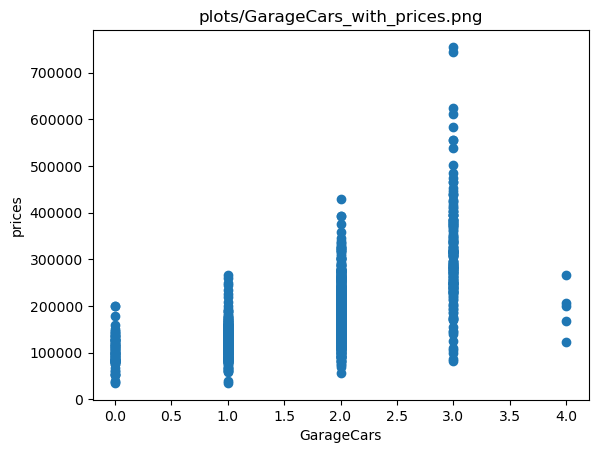

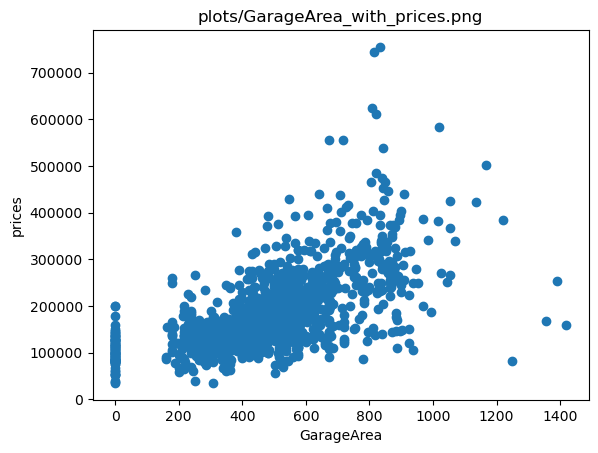

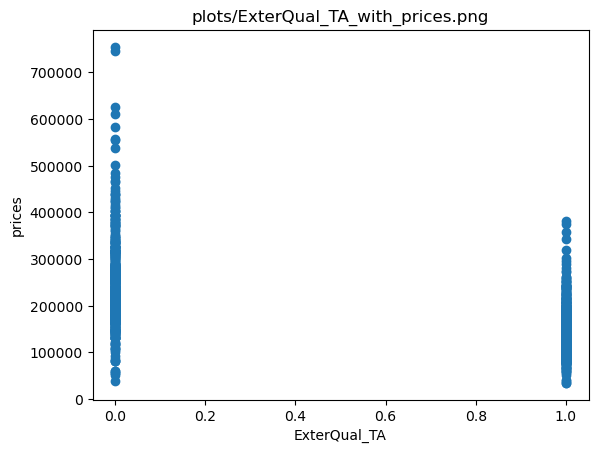

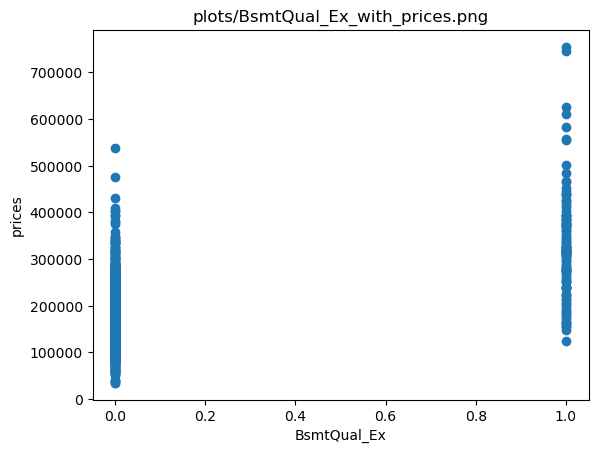

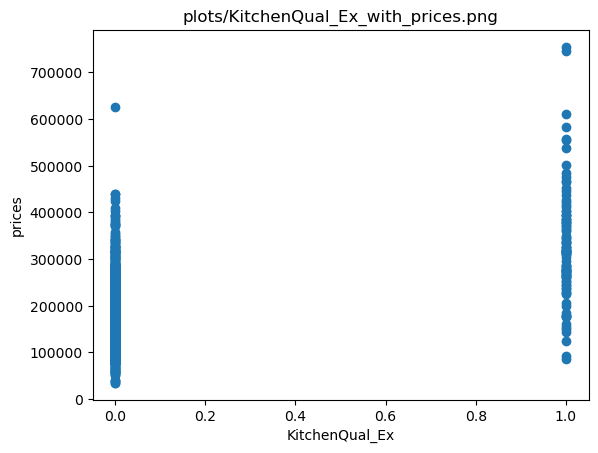

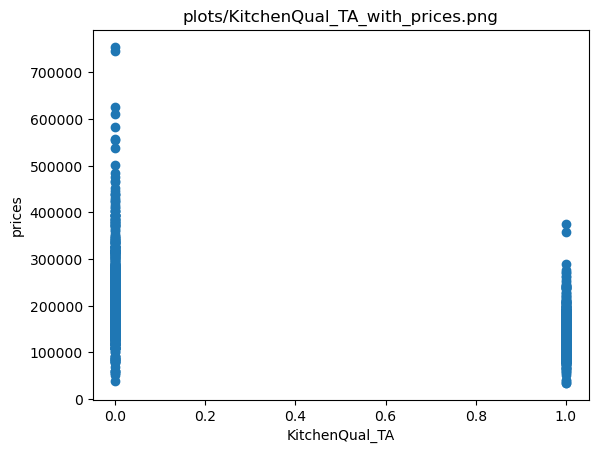

In [377]:
plot_corr_with_target(df_final, target_col="prices")

In [416]:
X, y = df_final.iloc[:, :-1], df_final.iloc[:, -1]

In [417]:
X.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,ExterQual_TA,BsmtQual_Ex,KitchenQual_Ex,KitchenQual_TA,GarageFinish_Unf
0,7,2003,2003,856,856,1710,2,8,2,548,0.0,0.0,0.0,0.0,0.0
1,6,1976,1976,1262,1262,1262,2,6,2,460,1.0,0.0,0.0,1.0,0.0
2,7,2001,2002,920,920,1786,2,6,2,608,0.0,0.0,0.0,0.0,0.0
3,7,1915,1970,756,961,1717,1,7,3,642,1.0,0.0,0.0,0.0,1.0
4,8,2000,2000,1145,1145,2198,2,9,3,836,0.0,0.0,0.0,0.0,0.0


In [418]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: prices, Length: 1460, dtype: int64

In [419]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [420]:

X_train

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,ExterQual_TA,BsmtQual_Ex,KitchenQual_Ex,KitchenQual_TA,GarageFinish_Unf
135,7,1970,1970,1304,1682,1682,2,7,2,530,1.0,0.0,0.0,1.0,1.0
1452,5,2005,2005,547,1072,1072,1,5,2,525,1.0,0.0,0.0,1.0,0.0
762,7,2009,2009,756,764,1547,2,7,2,614,1.0,0.0,0.0,0.0,1.0
932,9,2006,2006,1905,1905,1905,2,8,3,788,0.0,1.0,1.0,0.0,0.0
435,7,1996,1996,799,827,1661,2,6,2,550,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,6,2006,2006,1314,1314,1314,2,6,2,440,0.0,0.0,0.0,0.0,0.0
1130,4,1928,1950,1122,1328,1981,2,7,2,576,1.0,0.0,0.0,0.0,1.0
1294,5,1955,1990,864,864,864,1,5,2,572,1.0,0.0,0.0,1.0,1.0
860,7,1918,1998,912,912,1426,1,7,1,216,0.0,0.0,0.0,0.0,1.0


In [421]:
X_test

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,ExterQual_TA,BsmtQual_Ex,KitchenQual_Ex,KitchenQual_TA,GarageFinish_Unf
892,6,1963,2003,1059,1068,1068,1,6,1,264,1.0,0.0,0.0,1.0,0.0
1105,8,1994,1995,1463,1500,2622,2,9,2,712,0.0,1.0,0.0,0.0,0.0
413,5,1927,1950,1008,1028,1028,1,5,2,360,1.0,0.0,0.0,1.0,1.0
522,6,1947,1950,1004,1004,1664,2,7,2,420,1.0,0.0,0.0,1.0,1.0
1036,9,2007,2008,1620,1620,1620,2,6,3,912,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,5,1958,1992,1056,1056,1056,1,6,1,308,1.0,0.0,0.0,1.0,0.0
323,3,1955,2005,1162,1163,1163,1,6,1,220,1.0,0.0,0.0,1.0,1.0
650,7,2007,2007,813,822,1665,2,7,2,562,0.0,0.0,0.0,0.0,0.0
439,6,1920,2000,684,684,1196,1,7,2,528,1.0,0.0,0.0,0.0,1.0


In [422]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [423]:
X_train = scaler.fit_transform(X_train)

In [424]:
X_test = scaler.transform(X_test)

In [429]:
import pickle
pickle.dump(scaler, open('models/scaling.pkl','wb'))

In [430]:
from sklearn.linear_model import LinearRegression

In [431]:
regression = LinearRegression()

In [432]:
regression.fit(X_train, y_train)

LinearRegression()

In [433]:
print(regression.coef_)

[19113.05666109  6262.15739513  3381.95054699  3604.286227
  3855.60356324 24376.45772562 -2126.79580552    87.44629525
 10633.16427678  -175.8042709  -1971.13227892 10756.83642661
  7341.00772314 -3843.99439206 -3514.53955587]


In [434]:
print(regression.intercept_)

181312.6927592955


In [435]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [436]:
reg_pred=regression.predict(X_test)

In [437]:
reg_pred

array([142440.10332194, 315187.36939256, 117252.7314583 , 160362.367312  ,
       334639.79458321,  61877.52536755, 210494.82310981, 158998.24530286,
        61143.83930058, 123099.62086882, 144995.8243875 , 111329.64486885,
       107568.73652952, 216899.68305786, 186318.20087369, 123851.40145981,
       213136.14028848, 131020.506101  , 114448.5545183 , 212868.3808101 ,
       178998.22904766, 221208.37938001, 186435.35304296, 118074.8613874 ,
       208398.86366926, 177491.76981247, 205747.12180022,  97957.34707113,
       181223.0002371 , 244945.26783467, 125201.35671014, 245071.42640457,
       235118.15433113,  90954.78818978, 252401.54470983, 140912.64216791,
       155725.84064597, 222670.62526239, 283292.4206683 ,  93296.38618427,
       135685.8533894 , 233373.16233879, 110329.65350178, 347729.92248763,
       123400.92387143, 166909.65915081, 105327.04393598, 108779.12769081,
       382002.40512583, 130638.12826955, 104208.27541579, 190912.00494486,
       126530.23343226, 2

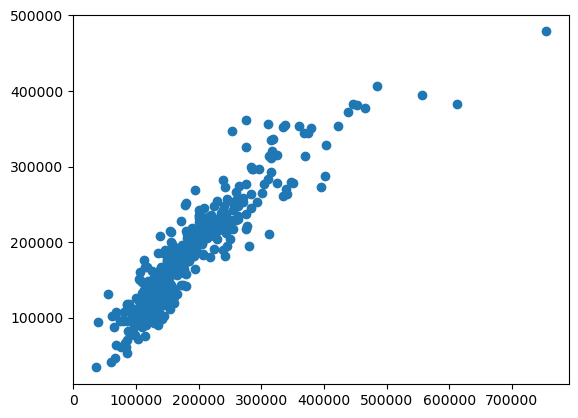

In [438]:
plt.scatter(y_test, reg_pred)

In [439]:
residuals = y_test - reg_pred

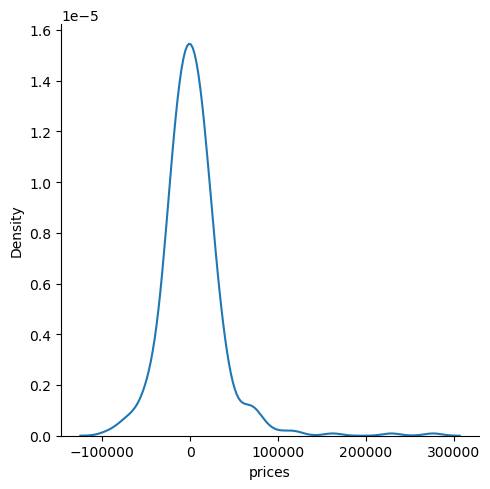

In [440]:
sns.displot(residuals,kind="kde")

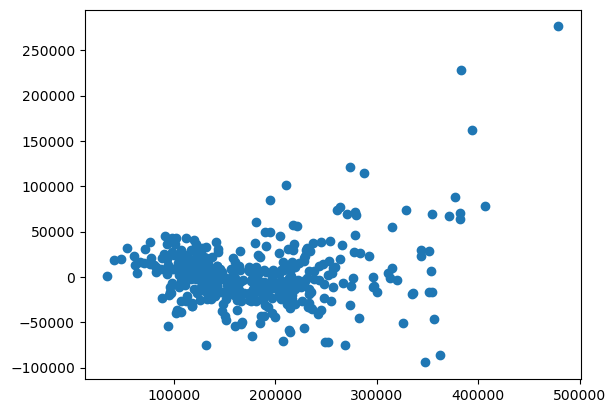

In [441]:
plt.scatter(reg_pred, residuals)

In [442]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

22392.402553603908
1166674001.2653356
34156.60992056055


In [443]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)

0.8328090677434101


In [444]:
1 - (1-score) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)

0.8268662620944792

In [445]:
import pickle

In [446]:
pickle.dump(regression,open('models/regmodel.pkl','wb'))

In [447]:
pickled_model=pickle.load(open('models/regmodel.pkl','rb'))

In [448]:
pickled_model.predict(scaler.transform(boston.data[0].reshape(1,-1)))

In [466]:
data = [7,2003,2003,856,856,1710,2,8,2,548,0,0,0,0,0]

In [468]:
ar = np.array(data)

In [470]:
ar.reshape(1, -1)

array([[   7, 2003, 2003,  856,  856, 1710,    2,    8,    2,  548,    0,
           0,    0,    0,    0]])

In [471]:
scaler.transform(ar.reshape(1, -1))

array([[ 0.63603069,  1.04135918,  0.87971741, -0.45564861, -0.80577836,
         0.34059405,  0.76784032,  0.89294816,  0.29606343,  0.34020931,
        -1.28629136, -0.3031177 , -0.26061578, -1.00195887, -0.93737744]])

In [474]:
output = regression.predict(scaler.transform(ar.reshape(1, -1)))

In [476]:
output[0]

212559.90683552783